In [2]:
import matplotlib.pyplot as plt
import paleo
from mastodon_functions import xml_features, csv_features, ordering_tracks_all
from paleo_functions import peak_detection_plots, manual_peak_curation, peak_detection, smoothing_filter

# Style for plots
plt.style.use('mastodon_style.mplstyle')
%matplotlib

Using matplotlib backend: MacOSX


# 3 - Peak Detection and Phase Analysis of cell tracks 

In this notebook we will import the .csv files obtained from Mastodon and we perform peack detection analysis by using both automatic analysis and a manual curation. Moreoever, we can obtain the phase of the oscillatory traces.

<a id='top'></a>
## Table of contents

[1] [Image Characteristics](#image): Check whether the uploaded files are indeed corresponding with the right images and imaging parameters.  

[2] [Peak Detection - automatic cell by cell](#automatic): You can check cell by cell how the peak detection algorithm works. For this, you can tune the parameters for peak detection and check how each individual cell behaves (even sibling cells!).

[3] [Peak Detection - automatic all cells](#all): Here you can then plot all the cells with the detected peaks one next to each other. Each of these cells will have an ID associated which can be observed in the title. Use this for later manual curation or cell exclusion.  

[4] [Peak Detection - manual curation](#manual): By selecting the ID of the cells, you can either exclude them from the analysis or chose them for manual curation. A new window will open where you can manually select the peaks.

[5] [Phase Analysis](#manual): Tune the parameters and perform phase analysis using the Hilbert Transform.

[6] [Code ir yourself!](#code): Until now all the code has been hidden and you only had to click a few boxes. In case you want to try coding yourself, we show you a some lines that will be useful to start preparing your own code. 

## Folder and data paths
In the next cell, you need to specify:
- ``path_xml``: Path and file name of the .xml file obtained from converting the data to HDF5/XML is stored.
- ``path_csv``: Path and file name of the .csv file obtained from the tracks from Mastodon. You do not need to add the -edges or -vertices extension.

In [3]:
position = 2

# Path to .xml file generated when creating the .hdf5
path_xml = '../Data/Position%d_20191213.xml'%position # Path to .xml file

# Path to the -edges.csv amd -vertices.csv files (You only need path + name of file without the -edges or -vertices extension)
path_csv = '../Data/Position%d-20191213-v19'%position 

## Image characteristics
<a id='image'></a>

Because we stored the data as an XML/HDF5, the .xml file contains all the metadata we need. We will now extract it in order to know pixel size, number of planes, image dimensions  and total number of timepoints. 

You only need to specify the temporal resolution in seconds that you used to acquire the data (``tr``). 

If you want to go back to the table of contents click [here](#top).

In [4]:
# Time resolution in seconds (how often do you acquire time points)
tr = 90
tr_min = round(tr/60,2) # in minutes

fts = xml_features(path_xml)

# Features from the image obtained from the .xml generated by BigData Viewer
print('The image has the following dimensions (XYZC): %d, %d, %d, %d'%(fts.width, fts.height, fts.n_slices, fts.channels))
print('There are %d frames in total.'%fts.n_frames)
print('Pixel Size: x = %.3g %s, y = %.3g %s z = %.2g %s'%(fts.x_pixel, fts.units, fts.y_pixel, fts.units, fts.z_pixel, fts.units))
print('There are %d Z-slices in total'%fts.n_slices)

The image has the following dimensions (XYZC): 2048, 2048, 150, 2
There are 299 frames in total.
Pixel Size: x = 0.347 micron, y = 0.347 micron z = 1.5 micron
There are 150 Z-slices in total


## Data organization: build the cell tracks

The function ``csv_features`` obtain all the features from each individual spot as a single unit. These spots are then rearranged according to their cell track and using the function ``ordering_tracks``. As a result, we get two new objects called ``spots`` and ``tracks``.

By pressing ``spots.`` + <kbd>TAB</kbd> or ``tracks.`` + <kbd>TAB</kbd>, a list will pop with all the different variables you can obtain from the spot object or the tracks obtject. 

In [5]:
# Function to obtain all the spots' information from the .csv file
spots = csv_features(path_csv, path_xml)

# Order the time series according to each individual cell
tracks = ordering_tracks_all(path_csv, path_xml)

Arrange Cell Tracks: 100%|██████████| 128/128 [00:04<00:00, 30.25it/s]


## Automatic Peak Detection
<a id='automatic'></a>

Using [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html) peak detection function, you can now tune the parameters and check each individual cell to observe which are the ones that best fit your data. For more information on what each parameter represents, visit the [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html)

If you want to go back to the table of contents click [here](#top).

In [8]:
%matplotlib widget
paleo.PeakDetectionAnalysis(path_csv, path_xml, tr_min)

FloatProgress(value=25.0, description='CPU %:', style=ProgressStyle(bar_color='blue'))

interactive(children=(Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widge…

PeakDetectionAnalysis(children=(Tab(children=(VBox(children=(ToggleButton(value=False, description='Interactiv…

### Observe all the cells with the peaks
<a id='all'></a>

Here we show all the peaks automatically detected with the algorithm using the selected parameters by the user. Then, the user can either choose to (1) manually detect all the peaks, (2) manually curate some of the cells, (3) do not curate or change any peak since they they are perfect (unlikly!). 

Change the parameters as many times as needed, then press the ``  Plot  `` button.

If you want to go back to the table of contents click [here](#top).

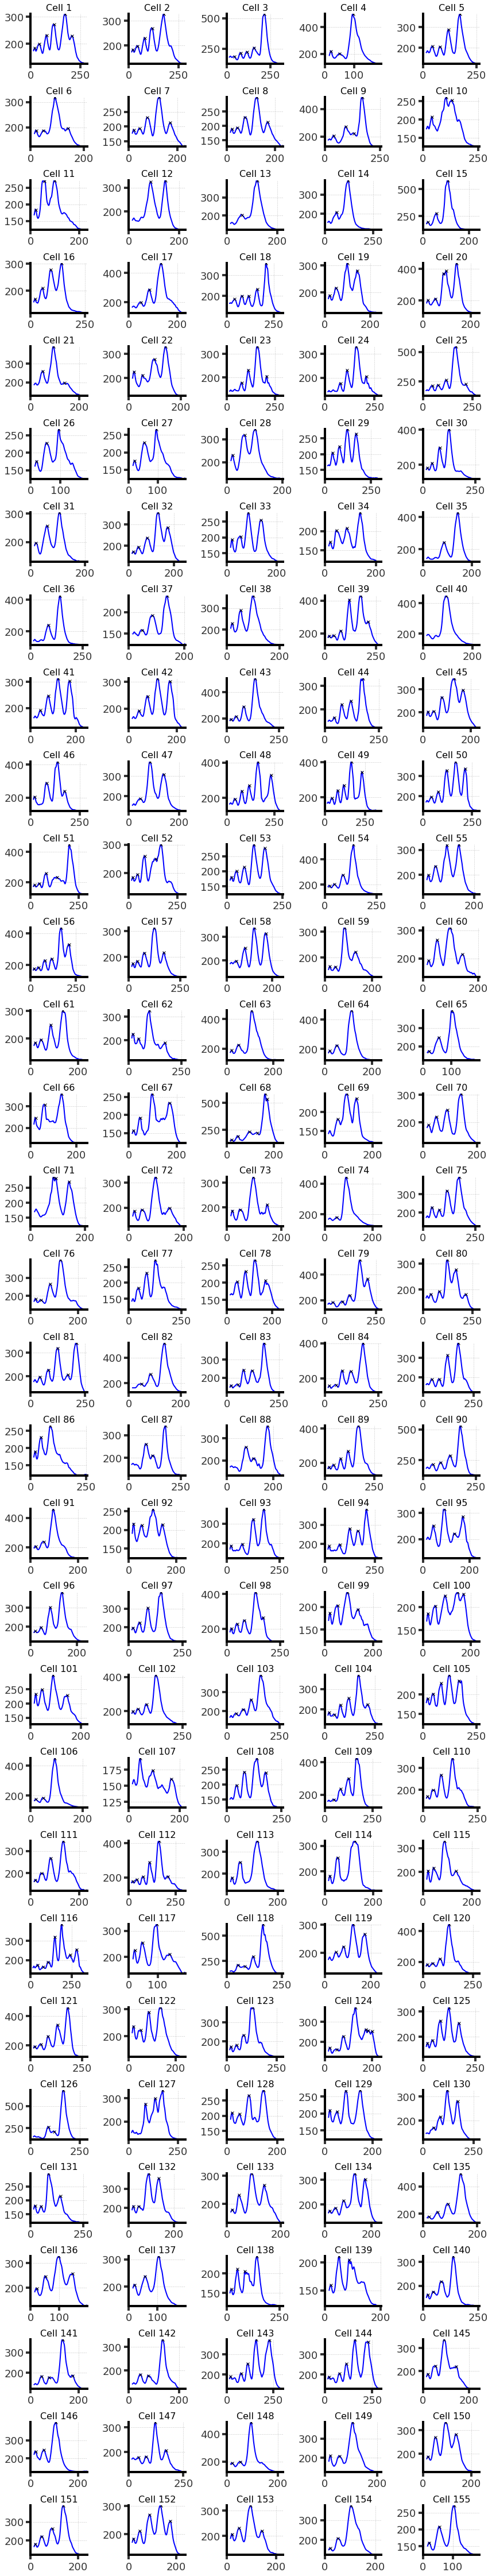

In [9]:
%matplotlib inline
peak_params = peak_detection_plots(tracks, tr_min);

## Manual curation
<a id='manual'></a>

A new window will open where you can then add the peaks manually. To do so:
- Left click: Add a peak
- Right click: Remove a peak
- <kbd>return</kbd> or <kbd>Enter</kbd>: Next cell

You can make as many clicks as possible. If something goes wrong you can always close the figure and re-run the cell. 

To chose which cells to exclude (``exclude_cells``) or to manually curate (``curate_cells``), you need to specify the ID given in the above figure. 

Once you finished clicking the desired peaks, all the cell tracks will appear with the final peaks.

If you want to go back to the table of contents click [here](#top).

In [11]:
 # Options: [], [1,2,3,9,20]
exclude_cells = [1,2,3,9,20]

# Options: [], 'all', [1,2,3,9,20]
curate_cells = [12, 107]

In [13]:
%matplotlib
peaks_curated = manual_peak_curation(tracks, tr_min, curate_cells, exclude_cells,
                                     peak_params.window_slider.value, peak_params.peaks_all)

Using matplotlib backend: MacOSX


## Phase Analysis
<a id='phase'></a>

Here we show the phase analysis. To do so, we follow 3 simple steps:

### [1] Crop the signal

To perform the Phase analysis, we use only the oscillatory part of the cell, so after the last detected peak, we ignore that area since this could add noise into the Hilbert Transform analysis which will be done later. 

### [2] Butterworth Filter

Using the python package [scipy](https://scipy.org), we apply a Butterworth band-pass filter using as sampling frequency the temporal step used for imaging (defined here as ``tr_min``). The user can define the order of the filer ``N`` and the critical frequencies ``Wn``. For more information, visit the [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html).

### [3] Hilbert transform and phase calculation

For the [Hilbert Transform](https://en.wikipedia.org/wiki/Hilbert_transform) calculation we only need the crpped trace (which was done in the above Jupyter cell) and the temporal resoltuion ``tr`` in seconds. 

Below we show for each cell, the <font color='black'>**Original Trace**</font>, the <font color='blue'>**Hilbert Transform**</font> and the <font color='red'>**Phase**</font>, as shown in the example below:


<img src="../Images-Notebook/HilbertTransform_example.png" width="500" align="center">


If you want to go back to the table of contents click [here](#top).

In [15]:
%matplotlib widget
plt.style.use('mastodon_style.mplstyle')

# Which channel do you want to use for phase analysis?
channel = 0

paleo.PhaseAnalysis(tracks, tr_min, peak_params.window_slider.value, 
                    peak_params.peaks_all, channel)

FloatProgress(value=24.6, description='CPU %:', style=ProgressStyle(bar_color='blue'))

interactive(children=(Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widge…

PhaseAnalysis(children=(Tab(children=(VBox(children=(ToggleButton(value=False, description='Interactivity', ic…

## Code it yourself!
<a id='code'></a>

If you want to go back to the table of contents click [here](#top).